# Avaliação Semanal 6: <br>Classificação - Knn, Regressão Logistica, Naive Bayes.

### Questão 1:

Com relação ao algoritmo k-vizinhos, assinale a alternativa correta:

Escolha uma opção:

a.No método k-vizinhos, nunca ocorre overfitting.<br>
<font color='red'>b.O algoritmo não “aprende” um modelo, apenas memoriza objetos de treinamento.</font> <br>
c.É um classificador linear.<br>
d.O número de vizinhos k é um parâmetro do modelo.<br>
e.O número de vizinhos k não influencia na classificação.<br>

### Questão 2:

Com relação à regressão logística:

Escolha uma opção:

a.Nunca ocorre overfitting.<br>
<font color='red'>b.A superfície de separação são hiperplanos (lineares).</font><br>
c.É um classificador não-linear.<br>
d.O parâmetro beta do modelo não influencia na classificação.<br>
e.Só é possível usá-lo para o caso de duas classes.<br>

### Questão 3:

Com relação ao algoritmo Naive Bayes:

Escolha uma opção:

<font color='red'>a.Assume que as variáveis que descreve os atributos são independentes.</font><br>
b.Só pode ser usado para dados numéricos.<br>
c.Não é robusto a ruídos e atributos irrelevantes.<br>
d.Todas as probabilidades exigidas não podem ser calculadas dos dados de treinamento em uma passagem.<br>
e.Assume que os atributos são correlacionados.<br>

### Questão 4:
Considere a base de dados 'vertebralcolumn-2C'.    
Calcule a acurácia na classificação usando Naive Bayes.    
Considere 20% dos dados no conjunto de teste e o método hold-out.    
Considere o código abaixo.    
Arredonde para uma casa decimal.

Escolha uma opção:

<font color='red'>a.0.8</font><br>
b.0.1<br>
c.0.2<br>
d.0.5<br>
e.1.0<br>

In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

np.random.seed(42) # define the seed (important to reproduce the results)

data = pd.read_csv('data/vertebralcolumn-2C.csv', header=(0))
data = data.dropna(axis='rows') #remove NaN

data = data.to_numpy()
nrow,ncol = data.shape
y = data[:,-1]
X = data[:,0:ncol-1]

scaler = StandardScaler().fit(X)
X = scaler.transform(X)

from sklearn.model_selection import train_test_split
p = 0.2 # fraction of elements in the test set
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = p, random_state = 42)

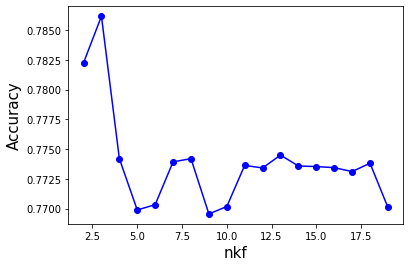

Melhor nkf: 3
Accuracy: 0.7861690665099422


In [54]:
from sklearn.model_selection import cross_validate
from sklearn.naive_bayes import GaussianNB

# Usando o método hold-out
vnkf = [] # armazena os valores de nkf
vscore = []
for nkf in range(2, 20):
    model = GaussianNB()
    # realiza a validação cruzada
    cv = cross_validate(model, x_train, y_train, cv=nkf)
    #print('k:', k, 'accurace:', cv['test_score'].mean())
    vscore.append(cv['test_score'].mean()) 
    vnkf.append(nkf)
    
plt.plot(vnkf, vscore, '-bo')
plt.xlabel('nkf', fontsize = 15)
plt.ylabel('Accuracy', fontsize = 15)
plt.show(True)
best_nkf = np.argmax(vscore)+2
print('Melhor nkf:', best_nkf)
print('Accuracy:', np.max(vscore))

In [44]:
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics

model = GaussianNB()
model.fit(x_train, y_train)

y_pred = model.predict(x_test)
print('Accuracy: ', round(model.score(x_test, y_test),1))

Accuracy:  0.8


In [45]:
from sklearn.metrics import accuracy_score
round(accuracy_score(y_test, y_pred), 1)


0.8

In [46]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

    Abnormal       0.92      0.77      0.84        44
      Normal       0.60      0.83      0.70        18

    accuracy                           0.79        62
   macro avg       0.76      0.80      0.77        62
weighted avg       0.83      0.79      0.80        62



### Questão 5:
Considere a base dados artificial gerada pelo código abaixo.    
Considerando o algoritmo regressão logística, qual é a taxa de acerto na classificação?

Escolha uma opção:

a.0,2<br>
b.0,1<br>
<font color='red'>c.1,0</font> <br>
d.0,5<br>
e.0,6<br>

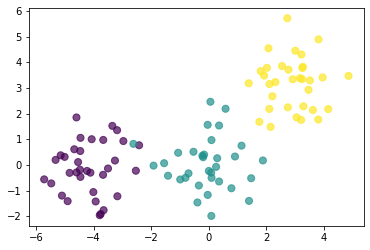

In [27]:
import sklearn.datasets as skdata
from matplotlib import pyplot
from pandas import DataFrame
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt

# Gera os dados em duas dimensões
n_samples = 100 # número de observações

# centro dos grupos
centers = [(-4, 0), (0, 0), (3, 3)]
X, y = skdata.make_blobs(n_samples=100, n_features=2, cluster_std=1.0, centers=centers, shuffle=False, random_state=42)

plt.figure(figsize=(6,4))
plt.scatter(X[:,0], X[:,1], c=y, cmap='viridis', s=50, alpha=0.7)
plt.show(True)

from sklearn.model_selection import train_test_split
p = 0.2 # fraction of elements in the test set
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = p)


In [28]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

model = LogisticRegression(solver = 'lbfgs', max_iter = 1000)
model.fit(x_train, y_train)

y_pred = model.predict(x_test)
print('Acurácia: ', round(model.score(x_test, y_test),6))

Acurácia:  1.0


In [29]:
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics

model = GaussianNB()
model.fit(x_train, y_train)

y_pred = model.predict(x_test)
print('Accuracy: ', model.score(x_test, y_test))

Accuracy:  1.0


In [34]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

model = KNeighborsClassifier(n_neighbors=4, metric = 'euclidean')
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
print('Accuracy:', accuracy_score(y_pred, y_test))

Accuracy: 1.0
